<a href="https://colab.research.google.com/github/casper6020/My-Portfolio/blob/main/loan_approval_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/DS_Projects/loan_approval_dataset.csv')
df.shape

(4269, 13)

**Check the number of observations, columns and datatypes.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


**The load ID column is irrelevant for the prediction. So, we can drop this column.**

In [4]:
df.drop("loan_id", axis=1, inplace=True)

### Exploratory Data Analysis

In [5]:
df.isnull().sum()  #Check If there is any Null values

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


**None of the variables has null values.**

In [6]:
cols = df.columns.to_list() #Check the columns names
print(cols)

[' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


**The columns names have white spaces, we need to clean them.**

In [7]:
cols = [col.strip() for col in cols]
df.columns = cols
print(cols)

['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [8]:
## We can seprate the numerical columns from the categorical columns based on their data types.
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns
print(set(num_cols))
print(set(cat_cols))

{'loan_amount', 'cibil_score', 'income_annum', 'bank_asset_value', 'luxury_assets_value', 'no_of_dependents', 'commercial_assets_value', 'residential_assets_value', 'loan_term'}
{'loan_status', 'education', 'self_employed'}


In [ ]:
#Descriptive Statistics for the Numerical Variables
df[num_cols].describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


#### Distribution of the Numerical Variables

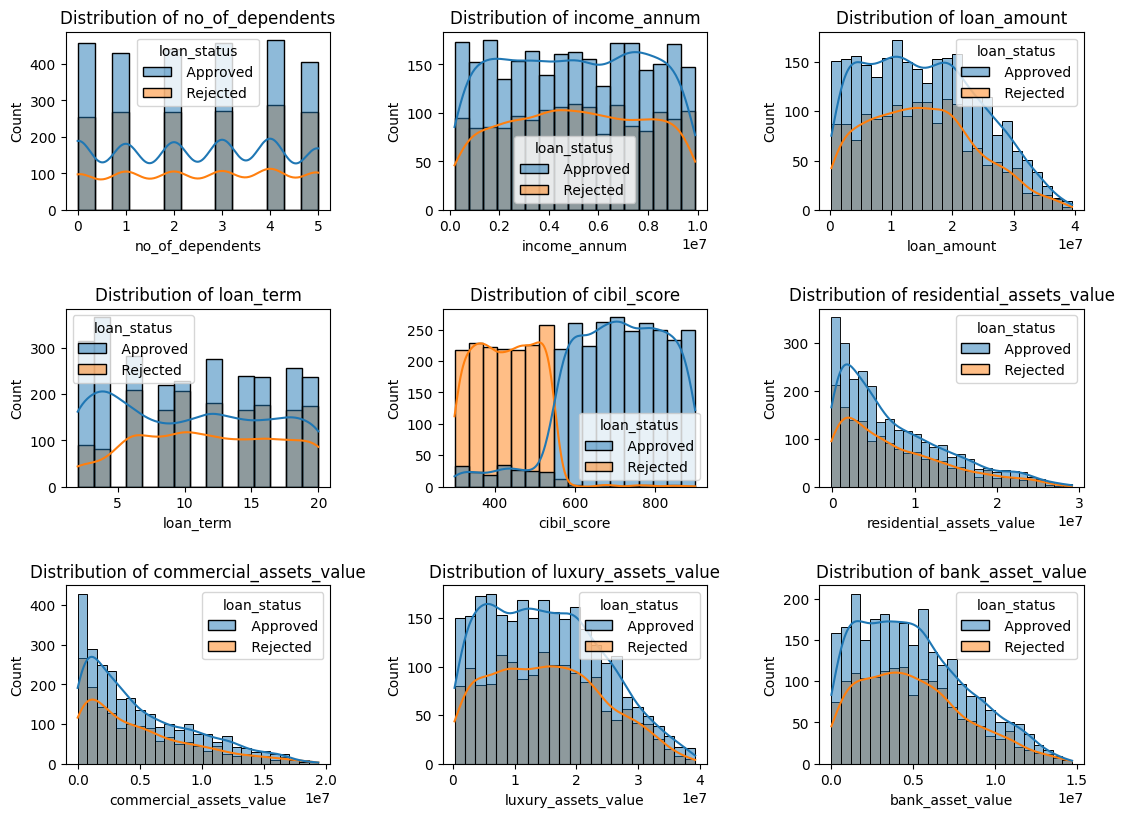

In [ ]:
## Observe the Distribution of the numerical variables in respect to the target variable
# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 9))  # 3 rows, 3 columns
fig.tight_layout(pad=5.0)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each variable and plot
for i, var in enumerate(num_cols):
    sns.histplot(data=df, x=var, hue='loan_status', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')

# Show the plot
plt.show()

**The histograms indicate that none of variables are normally distributed. From the graphs, it is evident that there are fewer number of customers owning high value resindential, commerical and bank asset value. Majority of the customers own low value residential, commerical and bank assets.**

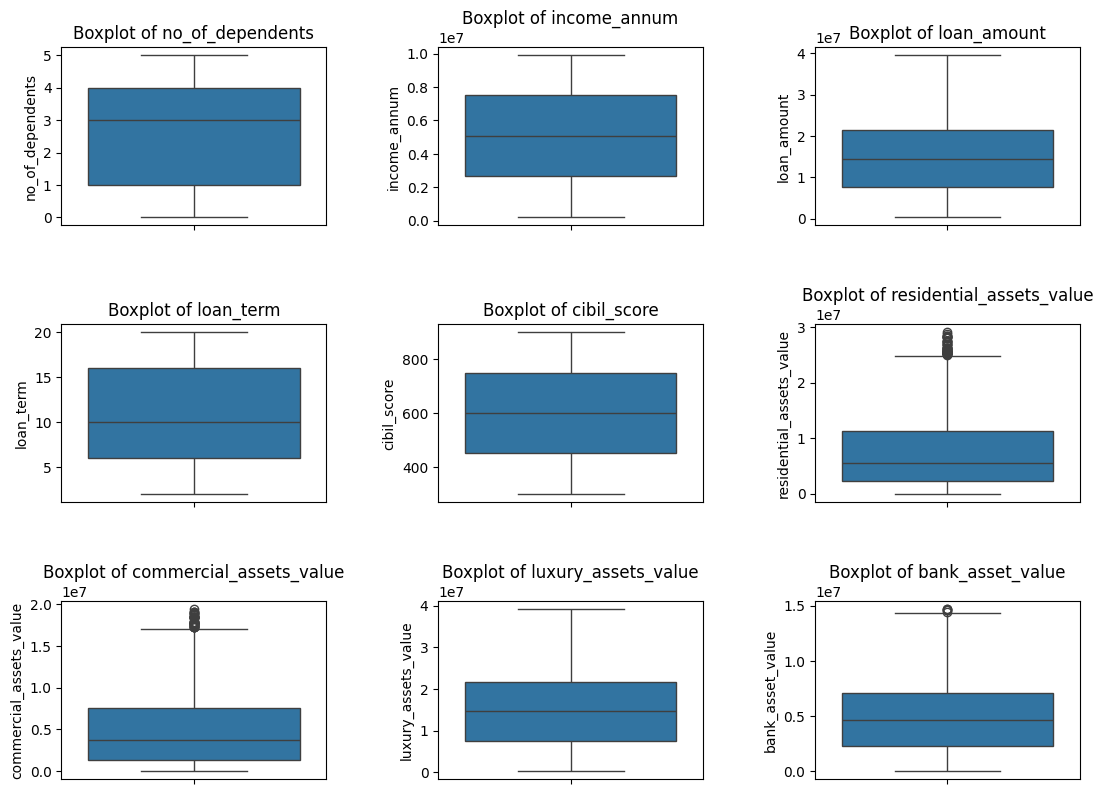

In [ ]:
# Creating Boxplots to check for outliers
fig, axes = plt.subplots(3, 3, figsize=(12, 9))  # 3 rows, 3 columns
fig.tight_layout(pad=5.0)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each variable and plot the boxplot
for i, var in enumerate(num_cols):
    sns.boxplot(data=df, y=var, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')

plt.show()

**The residential, commercial asset and bank asset value have outliers. We can perform shapiro-wilk test to ensure normal distribution.**

In [ ]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality
results = []
for var in num_cols:
    stat, p = shapiro(df[var])
    results.append({'Variable': var, 'Statistic': stat, 'p-value': p})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

                   Variable  Statistic       p-value
0          no_of_dependents   0.907973  4.420326e-45
1              income_annum   0.956443  6.163744e-34
2               loan_amount   0.972036  4.126739e-28
3                 loan_term   0.936045  1.873984e-39
4               cibil_score   0.956605  6.933788e-34
5  residential_assets_value   0.899031  1.409562e-46
6   commercial_assets_value   0.897656  8.486845e-47
7       luxury_assets_value   0.970805  1.187896e-28
8          bank_asset_value   0.959780  7.587522e-33


**None of the variables are normally distributed. Some are more skewed than others.**

#### Correlation between the Numerical Variables

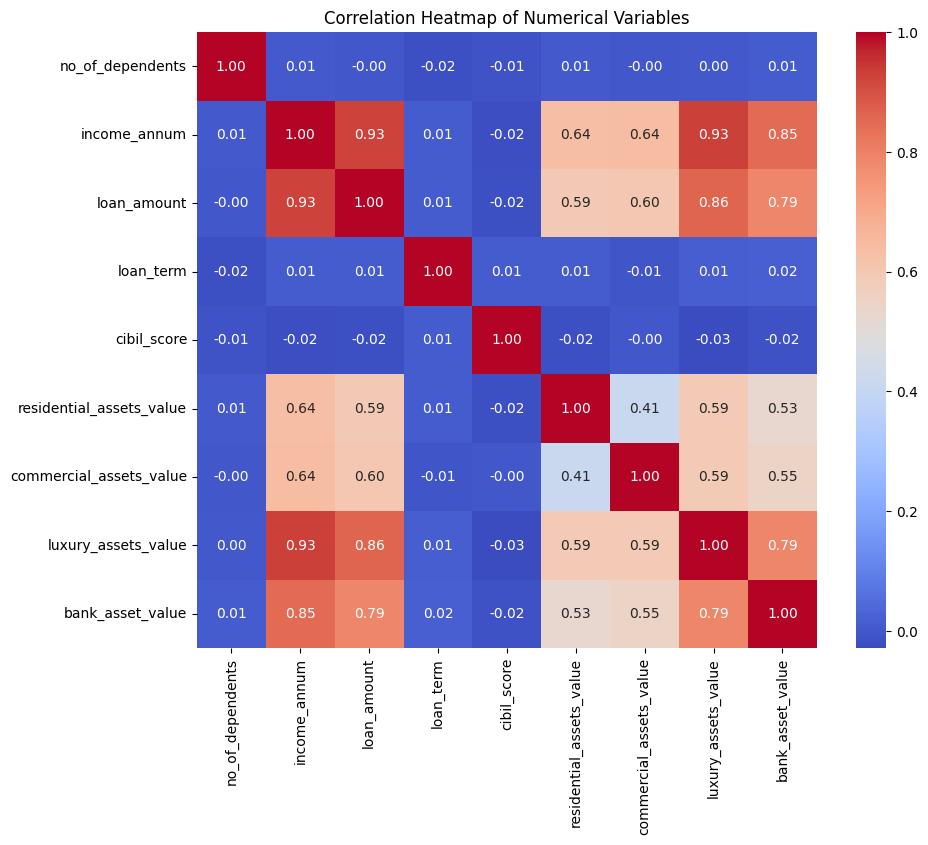

In [ ]:
## We create a heatmap to observe the correlation between the numerical variables.
# Compute the correlation matrix
corr_matrix = df[num_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

**Numerical variables such as income, asset values (e.g., residential, commercial, bank and luxuary) and loan amount are highly correlated. The annual income has a correlation of 0.93 with both applied loan amount and luxury asset value. This suggests that people with higher annual income are likely to apply for higher amount of loan and possess more luxury assets. We can observe the correlation between each pair of numerical variables in respect to the dependent variable (loan status) using scatterplot. Since, the heatmap indicated that income, asset values and loan amount are highly correlated. We focused on them.**

In [ ]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

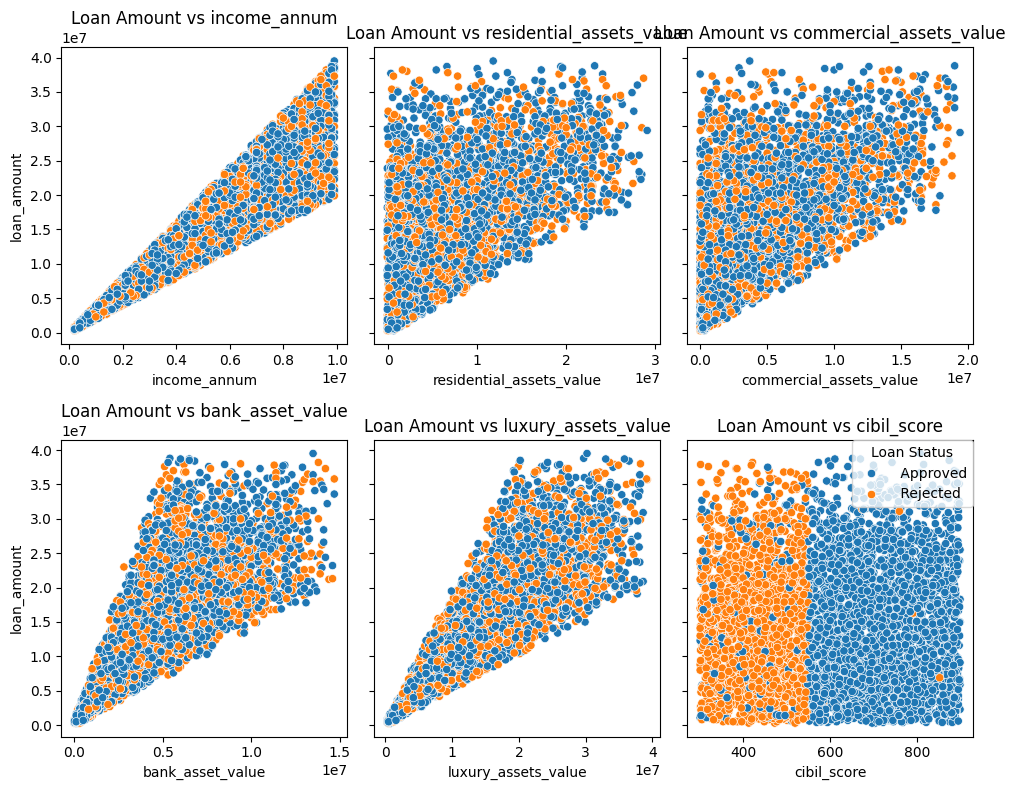

In [ ]:
x_cols = ["income_annum","residential_assets_value","commercial_assets_value","bank_asset_value",
          "luxury_assets_value","cibil_score"]

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 4*2), sharey=True)
axes = axes.flatten()

for i, col in enumerate(x_cols):
    sns.scatterplot(data=df, x=col, y="loan_amount", hue="loan_status", ax=axes[i])
    axes[i].set_title(f'Loan Amount vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('loan_amount')
    axes[i].get_legend().remove()

legend = plt.legend(title='Loan Status', loc='upper right', bbox_to_anchor=(1, 1), fontsize=10, borderaxespad=0)
legend.get_title().set_fontsize(10)
plt.tight_layout()
plt.show()

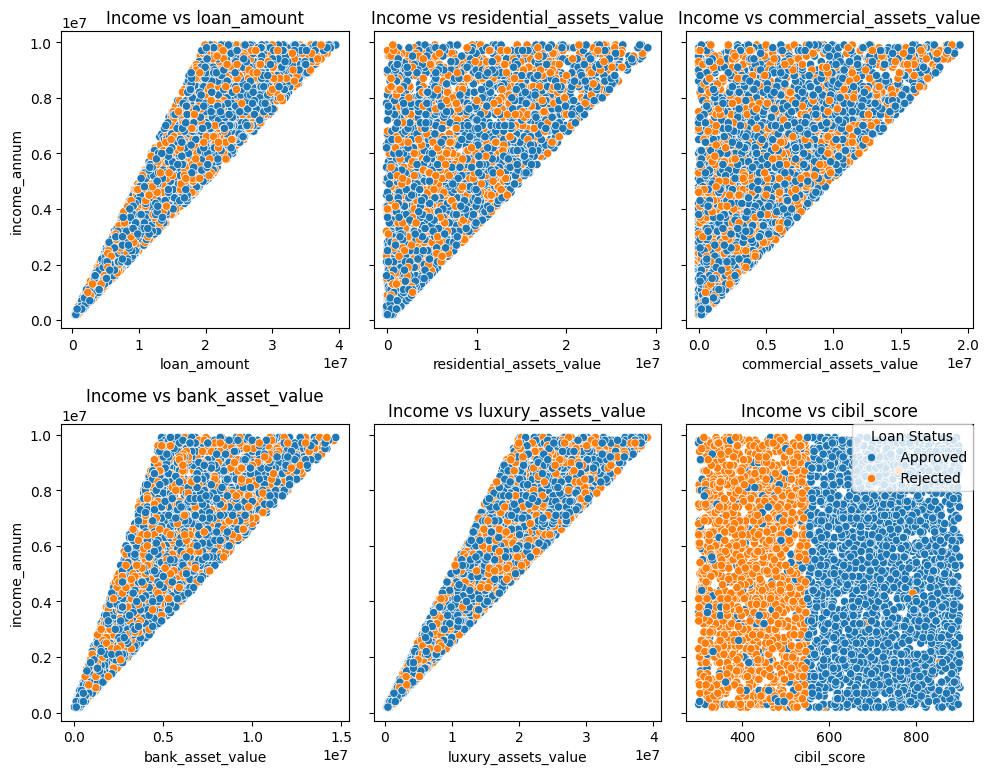

In [ ]:
x_cols = ["loan_amount","residential_assets_value","commercial_assets_value","bank_asset_value",
          "luxury_assets_value","cibil_score"]

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 4*2), sharey=True)
axes = axes.flatten()

for i, col in enumerate(x_cols):
    sns.scatterplot(data=df, x=col, y="income_annum", hue="loan_status", ax=axes[i])
    axes[i].set_title(f'Income vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('income_annum')
    axes[i].get_legend().remove()

legend = plt.legend(title='Loan Status', loc='upper right', bbox_to_anchor=(1, 1), fontsize=10, borderaxespad=0)
legend.get_title().set_fontsize(10)
plt.tight_layout()
plt.show()

**These scaterplot indicated that people with higher annual income and people who applied for higher amout of loan are likely to have more residential, commericialm, bank and luxury assets.**

#### Calculating VIF (variance inflation factor)
**To check for multicollinearity between the independent variables. Mullticollinearity can give erroneous estimation about the individual effect of an independent variable.**

In [9]:
# Create a copy of the data set
df_vif = df.copy()

# Checking the values of the categorical variables
for col in cat_cols:
  print(f"{col}: {df_vif[col].unique()}")

education: [' Graduate' ' Not Graduate']
self_employed: [' No' ' Yes']
loan_status: [' Approved' ' Rejected']


**There are white spaces in the values of categorical variables. we need to strip them.**

In [10]:
df_vif[cat_cols] = df_vif[cat_cols].apply(lambda x: x.str.strip())

In [11]:
# We encode the categorical variables
df_vif['loan_status'] = df_vif['loan_status'].map({'Approved':1, 'Rejected':0})
df_vif['education'] = df_vif['education'].map({'Graduate':1, 'Not Graduate':0})
df_vif['self_employed'] = df_vif['self_employed'].map({'Yes':1, 'No':0})

In [12]:
df_vif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int64
 2   self_employed             4269 non-null   int64
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


### Multiicollinearity
**To Check for multicollinearity, we use the variance inflatioin factor.**

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Dropping the target variable
X = df_vif.drop(["loan_status"], axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                     feature        VIF
0           no_of_dependents   2.873515
1                  education   1.923648
2              self_employed   1.929465
3               income_annum  74.439211
4                loan_amount  27.247918
5                  loan_term   3.971265
6                cibil_score   6.467688
7   residential_assets_value   3.910574
8    commercial_assets_value   3.883195
9        luxury_assets_value  27.542227
10          bank_asset_value  12.156972


**Annual income, applied loan amount, luxury asset value and bank asset value variables are highly correlated. Therefore, we cannot keep them in the model. In practice, VIF = 5 is considered the threshhold value.**

### Weight of Evidence and Information Value
**To determine the most important variables, WOE and IV are the most used methods in the field of credit risk modelling.**

*Before we calculate the WOE and IV, we need to discretize the numerical variables. To determine, the optimal number of bins, we use the Freedman-Diaconis Rule because it adapst well to the datasets with skewed distribution or with outliers.*

In [17]:
def freedman_diaconis(df: pd.DataFrame, col: str) -> tuple[float, int]:
    """
    Calculate the optimal number of bins for a numerical variable using the Freedman-Diaconis rule.

    parameters:
    df: dataframe which holds the variables
    col: variable of interest

    Returns:
    tuble[float, int]: bin width and number of bins
    """
    # Calculate the IQR
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    # Calculate the bin width
    n = len(df)
    bin_width = 2 * iqr * n ** (-1/3)
    bin_width = np.ceil(bin_width)

    # Calculate the number of bins

    n_bins = int((df[col].max() - df[col].min()) / bin_width)

    return bin_width, n_bins

In [21]:
col_dict = {}
for col in num_cols:
    bin_width, n_bins = freedman_diaconis(df_vif, col)
    col_dict[col] = n_bins
    print(f"For {col}: Optimal bin width: {bin_width} & Optimal Number of Bins:{n_bins}")

For no_of_dependents: Optimal bin width: 1.0 & Optimal Number of Bins:5
For income_annum: Optimal bin width: 591784.0 & Optimal Number of Bins:16
For loan_amount: Optimal bin width: 1701377.0 & Optimal Number of Bins:23
For loan_term: Optimal bin width: 2.0 & Optimal Number of Bins:9
For cibil_score: Optimal bin width: 37.0 & Optimal Number of Bins:16
For residential_assets_value: Optimal bin width: 1121923.0 & Optimal Number of Bins:26
For commercial_assets_value: Optimal bin width: 776716.0 & Optimal Number of Bins:24
For luxury_assets_value: Optimal bin width: 1750692.0 & Optimal Number of Bins:22
For bank_asset_value: Optimal bin width: 591784.0 & Optimal Number of Bins:24


In [23]:
print(col_dict['bank_asset_value'])

24


**Since none of the variables are normally distributed, we opted for equal frequency binning for the numerical variables.**

In [24]:
for col in num_cols:
    df_vif[f"{col}_binned"] = pd.qcut(df_vif[col], q=col_dict[col], duplicates='drop')

In [25]:
df_vif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   no_of_dependents                 4269 non-null   int64   
 1   education                        4269 non-null   int64   
 2   self_employed                    4269 non-null   int64   
 3   income_annum                     4269 non-null   int64   
 4   loan_amount                      4269 non-null   int64   
 5   loan_term                        4269 non-null   int64   
 6   cibil_score                      4269 non-null   int64   
 7   residential_assets_value         4269 non-null   int64   
 8   commercial_assets_value          4269 non-null   int64   
 9   luxury_assets_value              4269 non-null   int64   
 10  bank_asset_value                 4269 non-null   int64   
 11  loan_status                      4269 non-null   int64   
 12  no_of_

In [26]:
new_df = df_vif.drop(num_cols, axis=1)

In [32]:
def calculate_woe_iv(df: pd.DataFrame, feature: str, target: str) -> float:
    """
    Calculate the Weight of Evidence (WoE) and Information Value (IV) for a given feature,
    where 1 represents a default (bad outcome) and 0 represents no default (good outcome).

    Args:
    df: pd.DataFrame - The input DataFrame.
    feature: str - The column name of the feature for which WoE and IV are to be calculated.
    target: str - The column name of the binary target variable (1 for default, 0 for no default).

    Returns:
    float: The calculated Information Value (IV) for the given feature.
    """
    # Create a dataframe to hold the WoE and IV values for each bin
    df_woe = pd.DataFrame()

    # Create a groupby object for the feature and calculate the total good (0) and bad (1) counts per group
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])

    # Calculate the number of bad (defaults) and good (non-defaults) outcomes
    grouped['bad'] = grouped['sum']  # Total bad outcomes (defaults) per bin
    grouped['good'] = grouped['count'] - grouped['sum']  # Total good outcomes (no defaults) per bin

    # Total good and bad outcomes in the entire dataset
    total_good = grouped['good'].sum()  # Total number of good outcomes (no default)
    total_bad = grouped['bad'].sum()  # Total number of bad outcomes (default)

    # Calculate the proportion of good and bad outcomes in each bin
    grouped['prop_good'] = grouped['good'] / total_good
    grouped['prop_bad'] = grouped['bad'] / total_bad

    # Calculate WoE for each bin (avoid division by zero with small value adjustment)
    grouped['WoE'] = np.log((grouped['prop_good'] + 1e-10) / (grouped['prop_bad'] + 1e-10))

    # Calculate Information Value (IV) for each bin
    grouped['IV'] = (grouped['prop_good'] - grouped['prop_bad']) * grouped['WoE']

    # Sum the IV values to get the total IV for the feature
    total_iv = grouped['IV'].sum()

    # Add the total IV as an additional column
    # df_woe[feature] = grouped.index
    # df_woe['WoE'] = grouped['WoE'].values
    # df_woe['IV'] = grouped['IV'].values

    return total_iv

In [38]:
iv_dict = {}
for col in new_df.columns:
    if col == 'loan_status':
        continue
    else:
      iv = calculate_woe_iv(new_df, col, 'loan_status')
      iv_dict[col] = round(iv, 5)
      iv_df = pd.DataFrame(list(iv_dict.items()), columns=['Variable', 'IV'])
      iv_df = iv_df.sort_values(by='IV', ascending=False)

In [39]:
iv_df

,Variable,IV
6,cibil_score_binned,7.97907
5,loan_term_binned,0.17046
4,loan_amount_binned,0.02791
10,bank_asset_value_binned,0.01940
9,luxury_assets_value_binned,0.01835
7,residential_assets_value_binned,0.01793
8,commercial_assets_value_binned,0.01792
3,income_annum_binned,0.01497
2,no_of_dependents_binned,0.00151
0,education,0.00010


**In practive, a variable with IV value less than 0.02 means that variable has weak predictive power. Therefore, we develop the regression model with only cibil score, loan term and loan amount.**

### Modeling

In [53]:
## Now, we separate the data into train and test set
from sklearn.model_selection import train_test_split
ls_df = df_vif.loc[:, ["cibil_score", "loan_amount", "loan_term", "loan_status"]].copy()
train, test = train_test_split(ls_df, test_size=0.3, random_state=42)

In [54]:
X_train = train.drop("loan_status", axis=1)
y_train = train["loan_status"]
X_test = test.drop("loan_status", axis=1)
y_test = test["loan_status"]

In [55]:
import statsmodels.api as sm
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.449330
         Iterations 6


In [56]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                 2988
Model:                          Logit   Df Residuals:                     2985
Method:                           MLE   Df Model:                            2
Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                  0.3244
Time:                        01:13:40   Log-Likelihood:                -1342.6
converged:                       True   LL-Null:                       -1987.4
Covariance Type:            nonrobust   LLR p-value:                9.201e-281
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
cibil_score     0.0070      0.000     26.562      0.000       0.006       0.007
loan_amount -6.458e-08    5.1e-09    -12.664      0.000   -7.46e-08   -5.46e-08
loan_term      -0.1885      0.009    -20.837    